Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [2]:
# loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_csv('/content/winequality-red (1).csv')

In [3]:
# number of rows & columns in the dataset
wine_dataset.shape

(1599, 12)

In [4]:
# first 5 rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
#duplicate=wine_dataset.duplicated()
#print(duplicate.sum())
#wine_dataset[duplicate]


Data Analysis and Visulaization

In [10]:
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
print(wine_dataset.quality.value_counts)

<bound method IndexOpsMixin.value_counts of 0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64>


**Histogram**

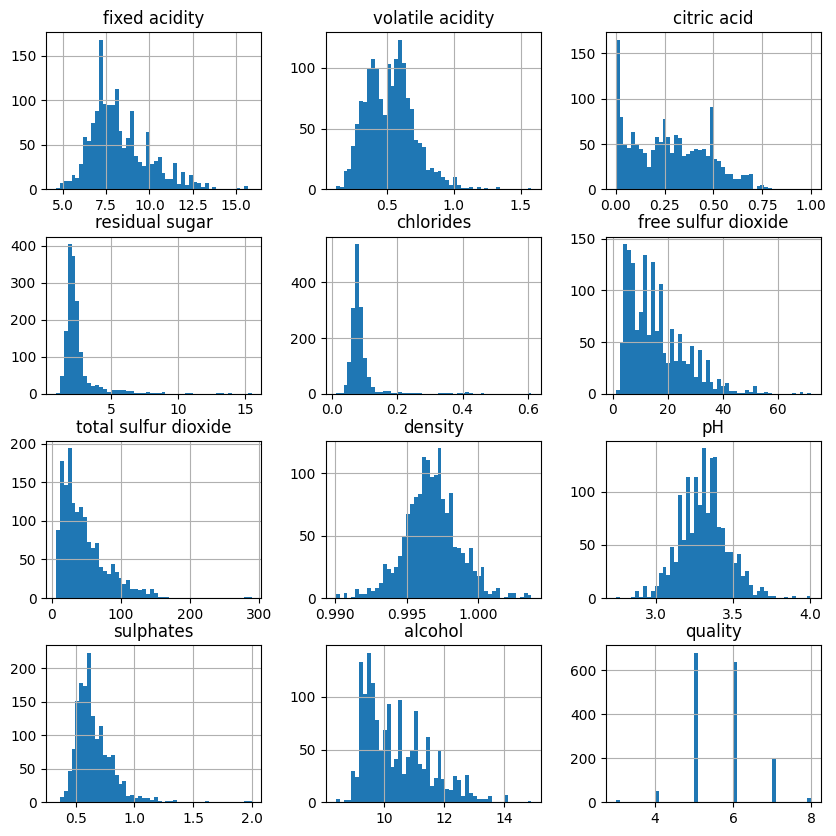

In [12]:
wine_dataset.hist(figsize=(10,10),bins=50)
plt.show()

In [ ]:
#wine_dataset['quality'].unique()

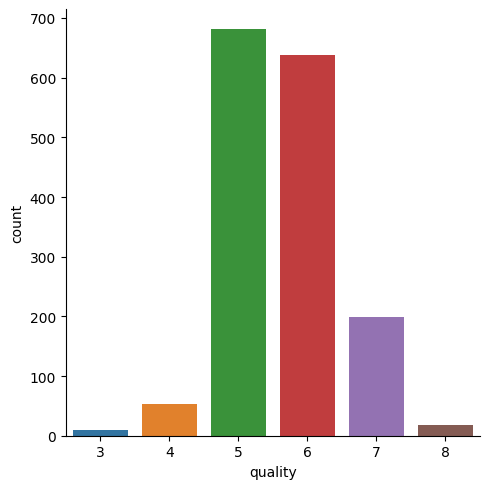

In [13]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

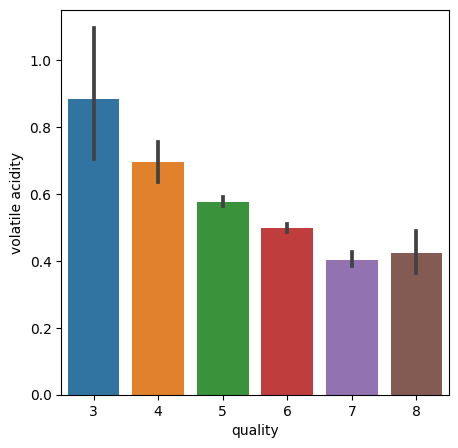

In [14]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

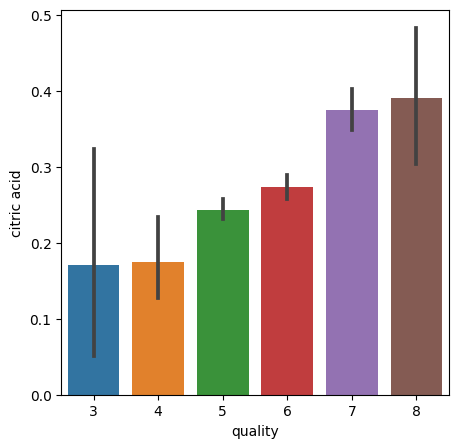

In [15]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)

<Axes: xlabel='quality', ylabel='residual sugar'>

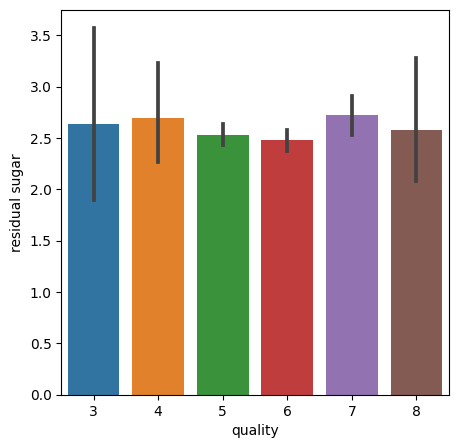

In [16]:
# residual sugar vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'residual sugar', data = wine_dataset)

<Axes: xlabel='quality', ylabel='chlorides'>

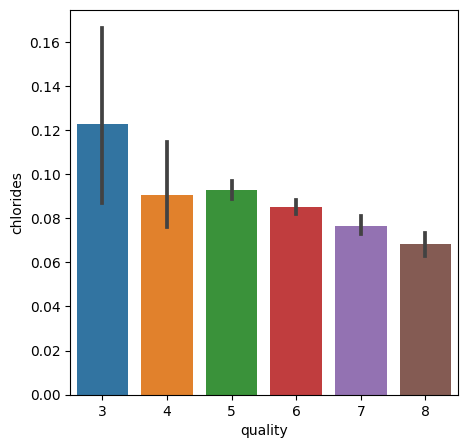

In [17]:
# chlorides vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'chlorides', data = wine_dataset)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

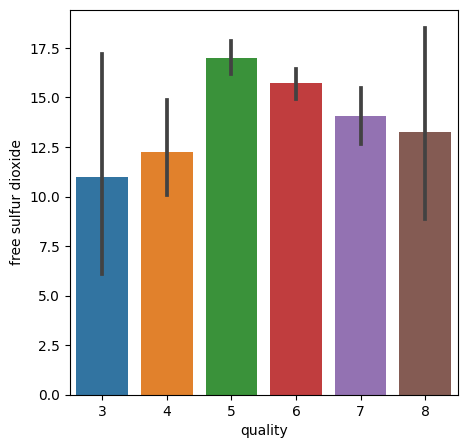

In [18]:
# free sulfur dioxide vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'free sulfur dioxide', data = wine_dataset)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

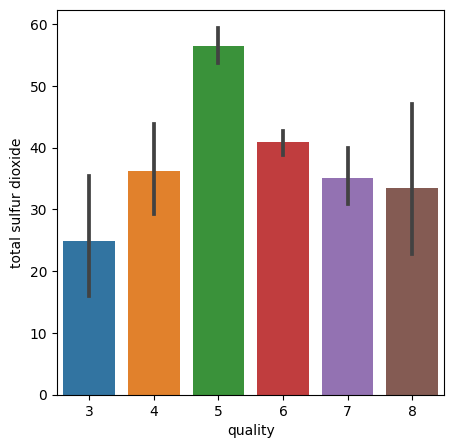

In [19]:
# total sulfur dioxide vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'total sulfur dioxide', data = wine_dataset)

<Axes: xlabel='quality', ylabel='density'>

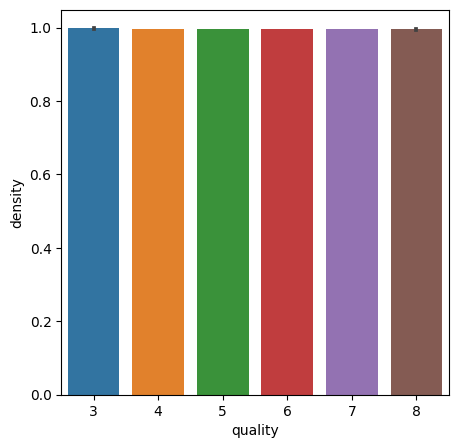

In [20]:
#density vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'density', data = wine_dataset)

<Axes: xlabel='quality', ylabel='pH'>

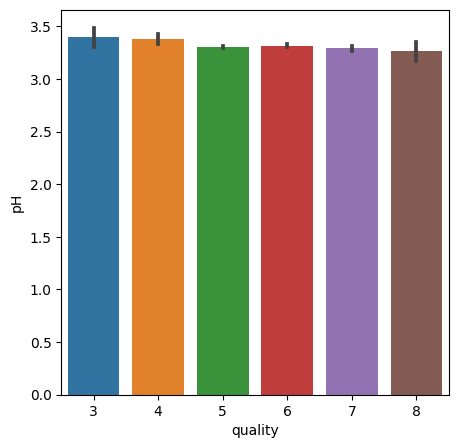

In [21]:
#pH vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'pH', data = wine_dataset)

<Axes: xlabel='quality', ylabel='sulphates'>

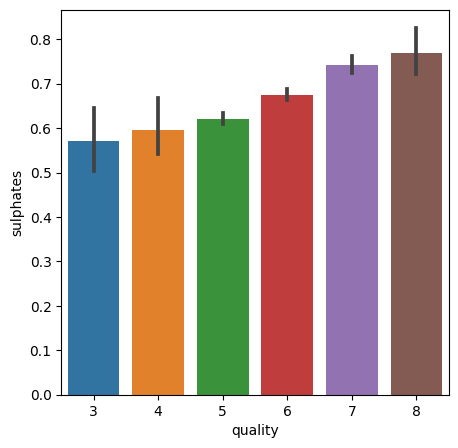

In [22]:
#sulphates vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'sulphates', data = wine_dataset)

<Axes: xlabel='quality', ylabel='alcohol'>

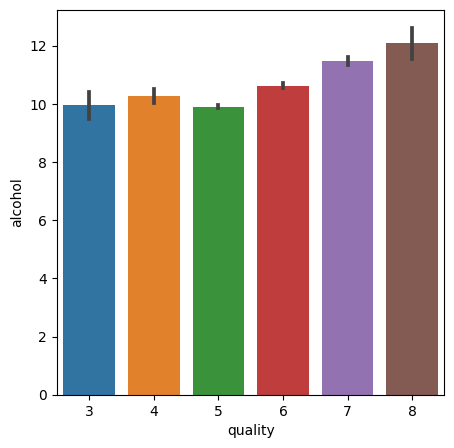

In [23]:
#alcohol vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'alcohol', data = wine_dataset)

Correlation

1. Positive Correlation
2. Negative Correlation

In [24]:
correlation = wine_dataset.corr()

<Axes: >

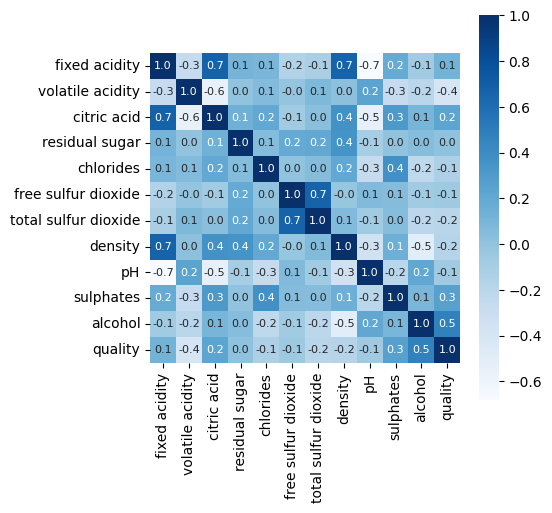

In [25]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

Data Preprocessing

In [26]:
# separate the data and Label
X = wine_dataset.drop('quality',axis=1)

In [27]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Label Binarizaton

In [28]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
wine_dataset.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
58,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0,5
277,11.5,0.18,0.51,4.0,0.104,4.0,23.0,0.99960,3.28,0.97,10.1,6
1512,6.4,0.79,0.04,2.2,0.061,11.0,17.0,0.99588,3.53,0.65,10.4,6
120,7.3,1.07,0.09,1.7,0.178,10.0,89.0,0.99620,3.30,0.57,9.0,5
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8


In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


Train & Test Split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [30]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Model Training:



Model Evaluation

Accuracy Score

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.903125


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
y_pred = model.predict(X_test)

In [34]:
cm = confusion_matrix(Y_test, y_pred)

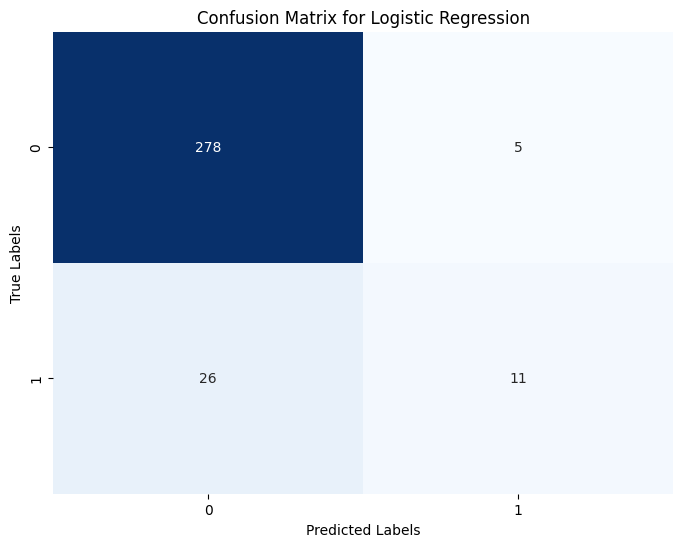

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()